In [49]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [25]:
data = pd.read_excel('D:\\Data-science\\glass.xlsx',sheet_name='glass')
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [26]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [9]:
data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [27]:
z_scores = stats.zscore(data)
z_scores

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451,-0.848275
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451,-0.848275
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451,-0.848275
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451,-0.848275
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451,-0.848275
...,...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451,2.010478
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451,2.010478
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451,2.010478
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451,2.010478


In [28]:
outliers_z = (z_scores > 3) | (z_scores < -3)
outliers_z

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
209,False,False,False,False,False,False,False,False,False,False
210,False,False,False,False,False,False,False,False,False,False
211,False,False,False,False,False,False,False,False,False,False
212,False,False,False,False,False,False,False,False,False,False


In [29]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
print(outliers_iqr)

        RI     Na     Mg     Al     Si      K     Ca     Ba     Fe   Type
0    False  False  False  False  False  False  False  False  False  False
1    False  False  False  False  False  False  False  False  False  False
2    False  False  False  False  False  False  False  False  False  False
3    False  False  False  False  False  False  False  False  False  False
4    False  False  False  False  False  False  False  False  False  False
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...
209  False  False  False   True  False  False  False   True  False   True
210  False  False  False  False  False  False  False   True  False   True
211  False  False  False  False  False  False  False   True  False   True
212  False  False  False  False  False  False  False   True  False   True
213  False  False  False  False  False  False  False   True  False   True

[214 rows x 10 columns]


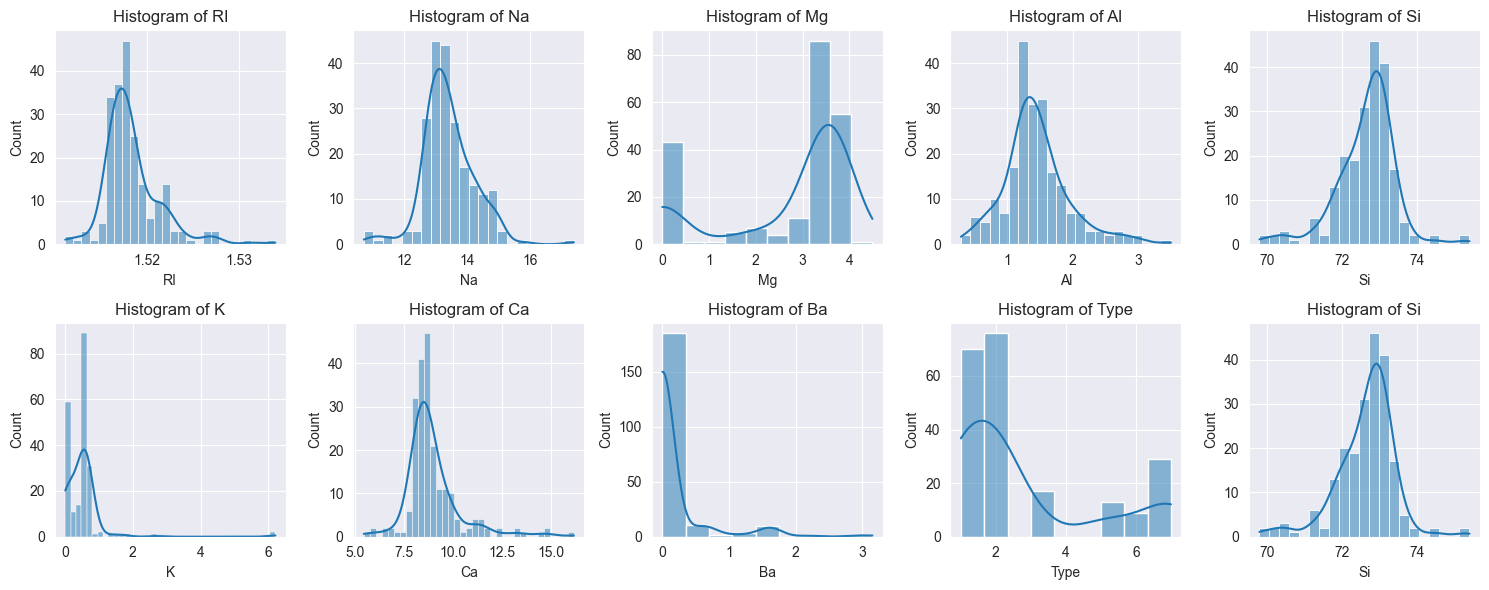

In [31]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

sns.histplot(data['RI'], kde=True, ax=axes[0][0])
axes[0][0].set_title('Histogram of RI')
    
sns.histplot(data['Na'], kde=True, ax=axes[0][1])
axes[0][1].set_title('Histogram of Na')
    
sns.histplot(data['Mg'], kde=True, ax=axes[0][2])
axes[0][2].set_title('Histogram of Mg')
    
sns.histplot(data['Al'], kde=True, ax=axes[0][3])
axes[0][3].set_title('Histogram of Al')
    
sns.histplot(data['Si'], kde=True, ax=axes[0][4])
axes[0][4].set_title('Histogram of Si')
    
sns.histplot(data['K'], kde=True, ax=axes[1][0])
axes[1][0].set_title('Histogram of K')
    
sns.histplot(data['Ca'], kde=True, ax=axes[1][1])
axes[1][1].set_title('Histogram of Ca')
    
sns.histplot(data['Ba'], kde=True, ax=axes[1][2])
axes[1][2].set_title('Histogram of Ba')
    
sns.histplot(data['Type'], kde=True, ax=axes[1][3])
axes[1][3].set_title('Histogram of Type')
    
sns.histplot(data['Si'], kde=True, ax=axes[1][4])
axes[1][4].set_title('Histogram of Si')
    
# Adjust layout for better appearance
plt.tight_layout()
plt.show()

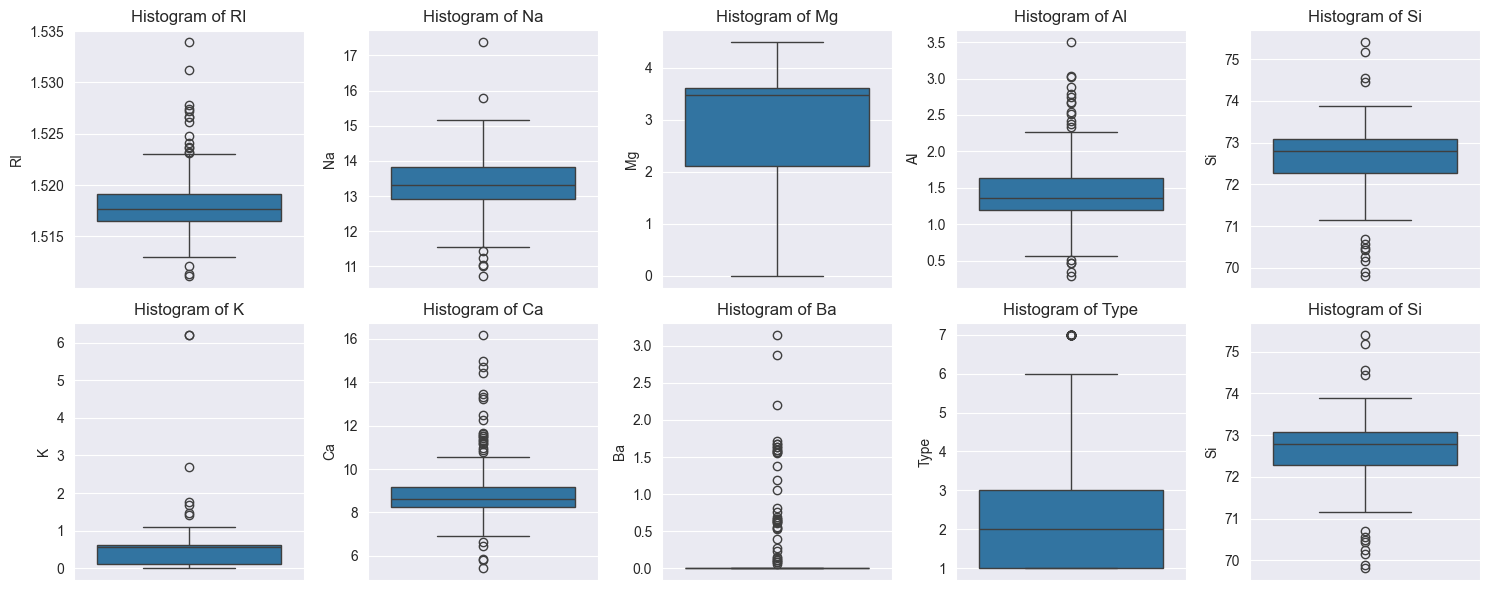

In [35]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
sns.boxplot(data['RI'],  ax=axes[0][0])
axes[0][0].set_title('Box plot of RI')
    
sns.boxplot(data['Na'], ax=axes[0][1])
axes[0][1].set_title('Box plot of Na')
    
sns.boxplot(data['Mg'], ax=axes[0][2])
axes[0][2].set_title('Box plot of Mg')
    
sns.boxplot(data['Al'], ax=axes[0][3])
axes[0][3].set_title('Box plot of Al')
    
sns.boxplot(data['Si'],  ax=axes[0][4])
axes[0][4].set_title('Box plot of Si')
    
sns.boxplot(data['K'], ax=axes[1][0])
axes[1][0].set_title('Box plot of K')
    
sns.boxplot(data['Ca'], ax=axes[1][1])
axes[1][1].set_title('Box plot of Ca')
    
sns.boxplot(data['Ba'], ax=axes[1][2])
axes[1][2].set_title('Box plot of Ba')
    
sns.boxplot(data['Type'], ax=axes[1][3])
axes[1][3].set_title('Box plot of Type')
    
sns.boxplot(data['Si'], ax=axes[1][4])
axes[1][4].set_title('Box plot of Si')
    
# Adjust layout for better appearance
plt.tight_layout()
plt.show()

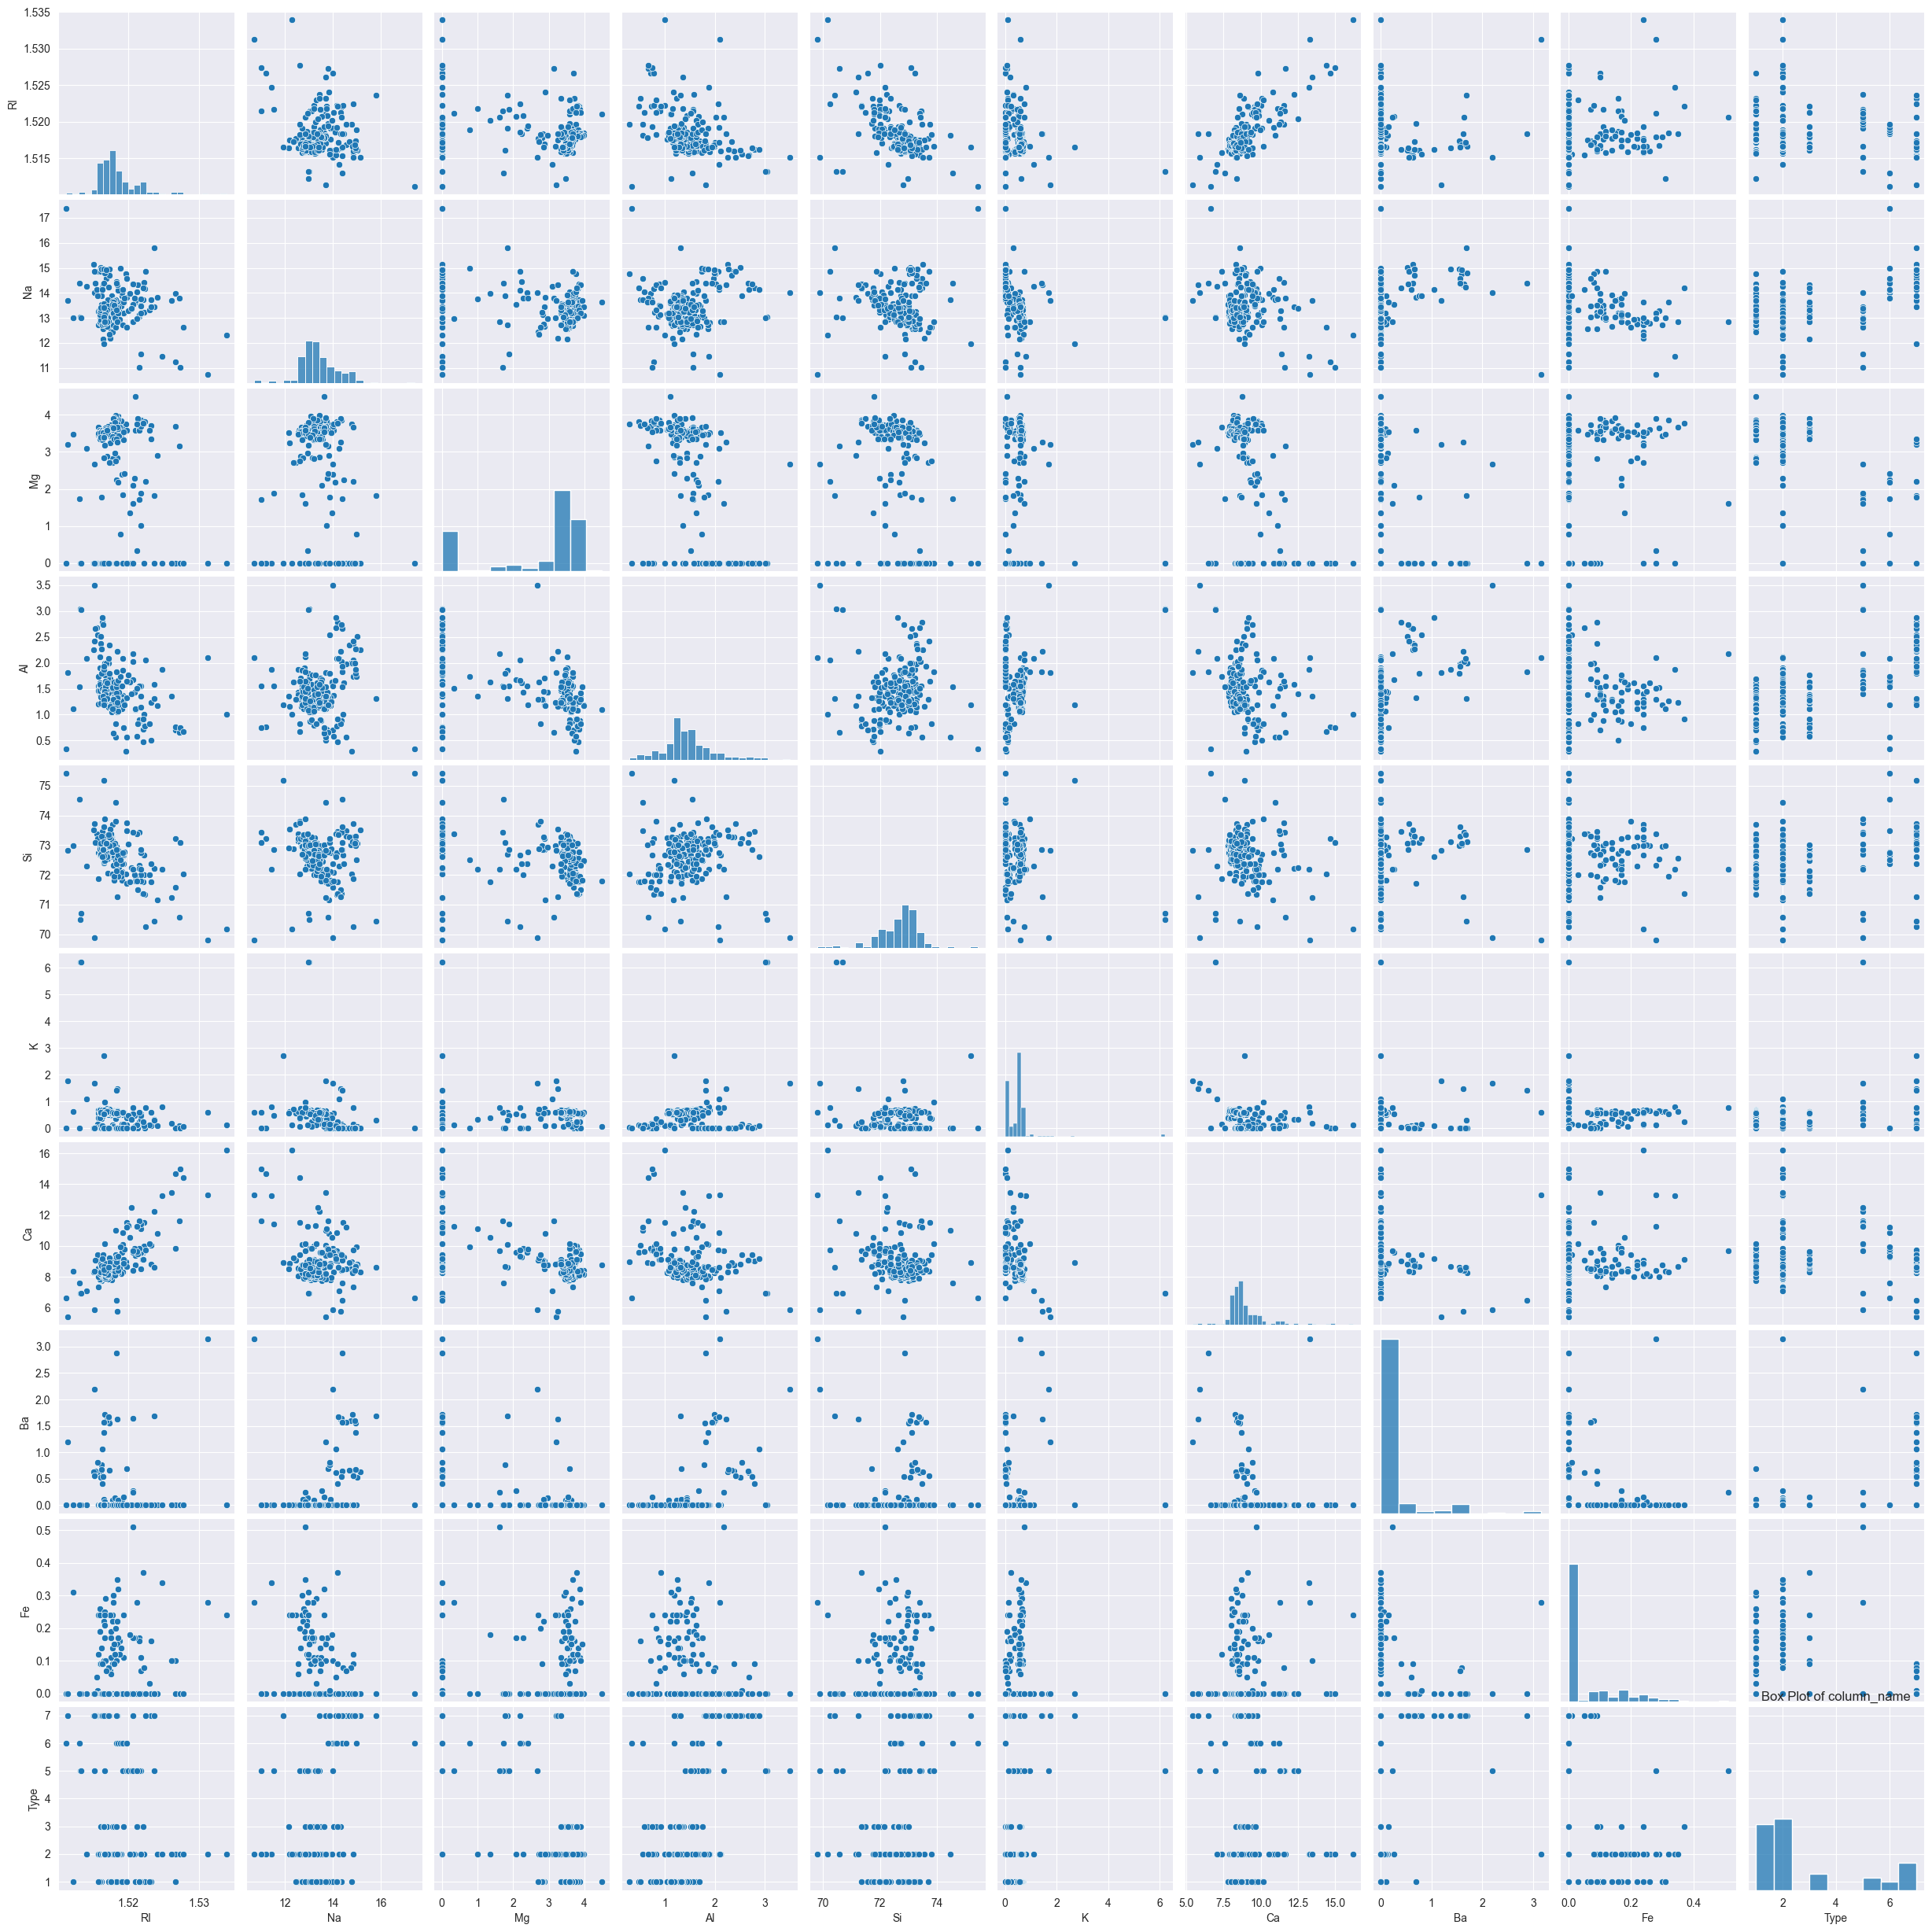

In [38]:
sns.pairplot(data)
plt.title('Box Plot of column_name')
plt.xlabel('Values')
plt.show()

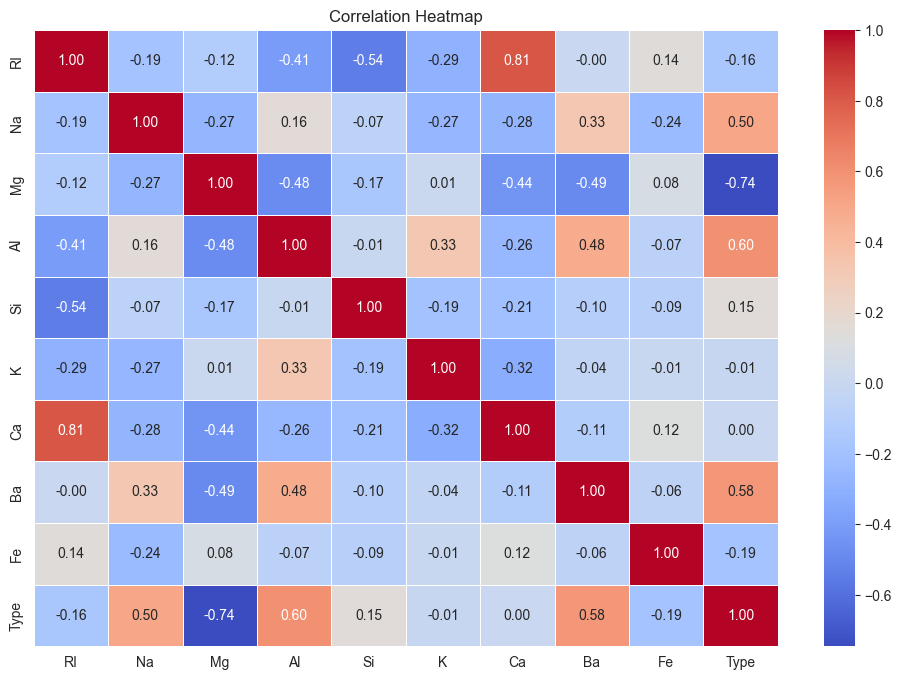

In [39]:
corr_matrix = data.corr()

# Heatmap visualization
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [42]:
x = data.drop(columns=['Type'])
y = data['Type']

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [46]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
print(pd.Series(y_train_resampled).value_counts())


Type
2    62
3    62
1    62
7    62
5    62
6    62
Name: count, dtype: int64


In [62]:
ramdom_forest = RandomForestClassifier(n_estimators=50, random_state=42)
ramdom_forest.fit(X_train_resampled, y_train_resampled)  # Use X_train and y_train if not using SMOTE

RandomForestClassifier(n_estimators=50, random_state=42)

In [53]:
# Make predictions on the test set
y_pred = ramdom_forest.predict(X_test_scaled)

# Evaluate the model's performance
from sklearn.metrics import classification_report, accuracy_score

# Print performance metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8140
              precision    recall  f1-score   support

           1       0.64      0.82      0.72        11
           2       1.00      0.57      0.73        14
           3       0.60      1.00      0.75         3
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.81        43
   macro avg       0.86      0.90      0.86        43
weighted avg       0.86      0.81      0.81        43



In [63]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost.fit(X_train_resampled, y_train_resampled)
y_pred_adaboost =adaboost.predict(X_test)
adaboost_acc = accuracy_score(y_test, y_pred_adaboost)
print(f"Accuracy: {adaboost_acc:.4f}")

C:\Users\naveen.julla\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.4186


C:\Users\naveen.julla\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
